In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("heart.csv") # reading in the file contents

The first 5 rows of the dataset:

In [4]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [5]:
print(df.nunique())

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64


In [19]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB
None


conclusie:
- Age, RestingBP, cholesterol, maxhr and oldpeak have very high unique numbers so those numbers range alot
- 2/3/4 aka very low numbers indicating that those attributes are probably categorical this is true for sexes, chestpain, fastingBS, restingECG, exercise angina, st_slope and heart disease

### Explanation of the 12 attributes in the dataset:

- **Age**: The age of the participant in years.
  
- **Sex**: The gender of the participant (M: Male, F: Female).
  
- **Chest Pain Type**: Describes the type of chest discomfort experienced by the participant:
    - **Typical Angina (TA)**: Chest pain or discomfort typically associated with heart problems, often triggered by physical exertion or emotional stress.
    - **Atypical Angina (ATA)**: Chest discomfort that doesn't fully meet the criteria for typical angina but still suggests a possible heart-related issue. The symptoms may vary and could include shortness of breath, nausea, or fatigue.
    - **Non-Anginal Pain (NAP)**: Chest discomfort not originating from the heart, which could be due to musculoskeletal issues, respiratory problems, gastrointestinal conditions, or anxiety.
    - **Asymptomatic (ASY)**: The participant does not experience any symptoms related to chest discomfort.

- **Resting Blood Pressure**: The participant's blood pressure measured while at rest, in millimeters of mercury (mm Hg).
  
- **Cholesterol**: The level of cholesterol in the participant's blood serum, measured in milligrams per deciliter (mm/dl).
  
- **Fasting Blood Sugar**: Indicates the participant's fasting blood sugar level:
    - **1**: If fasting blood sugar is greater than 120 mg/dl.
    - **0**: Otherwise.

- **Resting Electrocardiogram Results**: Interpretation of the resting electrocardiogram (ECG) findings:
    - **Normal**: ECG shows no abnormalities.
    - **ST**: ECG shows abnormalities in the ST-T wave, such as T wave inversions or ST elevation/depression of more than 0.05 millivolts (mV).
    - **LVH**: ECG suggests probable or definite left ventricular hypertrophy (enlargement of the heart's left ventricle) according to Estes' criteria.
  
- **Maximum Heart Rate Achieved**: The highest heart rate achieved during physical exertion, measured in beats per minute (bpm).

- **Exercise-Induced Angina**: Indicates whether the participant experienced angina (chest pain or discomfort) during exercise:
    - **Y**: Yes, the participant experienced exercise-induced angina.
    - **N**: No, the participant did not experience exercise-induced angina.
  
- **Oldpeak**: Refers to the ST depression observed during exercise, measured as a numeric value.

- **ST Slope**: Describes the slope of the peak exercise ST segment observed on the ECG:
    - **Up**: The ST segment slopes upwards during exercise.
    - **Flat**: The ST segment remains flat during exercise.
    - **Down**: The ST segment slopes downwards during exercise.
  
- **Heart Disease**: Indicates the presence or absence of heart disease:
    - **1**: Heart disease is present.
    - **0**: No heart disease is detected.

A codebook made of the dataset with help from the publications of the data.

In [36]:
codebook={
    "attribute": ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease'],
    "unit": ["year", "n.a.", "n.a.", "mm of Hg", "mm/dl", "n.a.", "n.a.", "bpm", "n.a.", "st depression", "n.a.", "n.a."],
    "dtype": ["int64", "category", "category", "int64", "int64", "int64", "category", "int64", "category", "float64", "category", "int64"],
    "description": [
        "The age of the participant", 
        "The gender of the participant", 
        "The type of pain the participant is experiencing", 
        "Recorded blood pressure at rest", 
        "The level of cholesterol in the participant's blood serum", 
        "Indicates the participant's fasting blood sugar level", 
        "Interpretation of the resting electrocardiogram (ECG) findings",
        "Maximum heat rate achieved during physical extraction", 
        "Indicates whether the participant experienced angina during exercise", 
        "ST depression observed during exercise", 
        "The slope of the peak exercise ST segment observed on the ECG", 
        "Indicates the presence or absence of heart disease"
    ]
}
pd.DataFrame(codebook).set_index("attribute")

,unit,dtype,description
attribute,,,
Age,year,int64,The age of the person
Sex,n.a.,category,The gender of the person
ChestPainType,n.a.,category,The type of pain the person is experiencing
RestingBP,mm of Hg,int64,Recorded blood pressure at rest
Cholesterol,mm/dl,int64,The level of cholesterol in the patient's bloo...
FastingBS,n.a.,int64,Indicates the patient's fasting blood sugar level
RestingECG,n.a.,category,Interpretation of the resting electrocardiogra...
MaxHR,bpm,int64,Maximum heat rate achieved during physical ext...
ExerciseAngina,n.a.,category,Indicates whether the patient experienced angi...


The data consists of 7 numeric and 5 categorical attributes. 

In [34]:
df.shape

(918, 12)

Verified that there are 918 rows and 12 attributes in the dataframe.

conclusie: 
- the data is correctly read and can be used for further steps.

## EDA univariaat
eda for every attribute including itself
- .isna().sum()
- .describe()
- .boxplot
- .hist
- sns.histplot
- pd.DataFrame(df["Age"].value_counts().sortindex())

Checking if there are NA values for all attributes and describe every attribute that are numeric.

In [ ]:
pd.DataFrame({
    "isna": df.isna().sum()
})

In [8]:
print(df.describe())

              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


conclusion:
- There are no values missing in any of the attributes.
- Resting blood pressure has a min of 0 which is impossible, so it must be deleted.(see below)

In [ ]:
# deletes a row/record in the data 

Because some of the data is above 100 and a lot also around 1 is, there is chosen to separate those to see more clearly. 

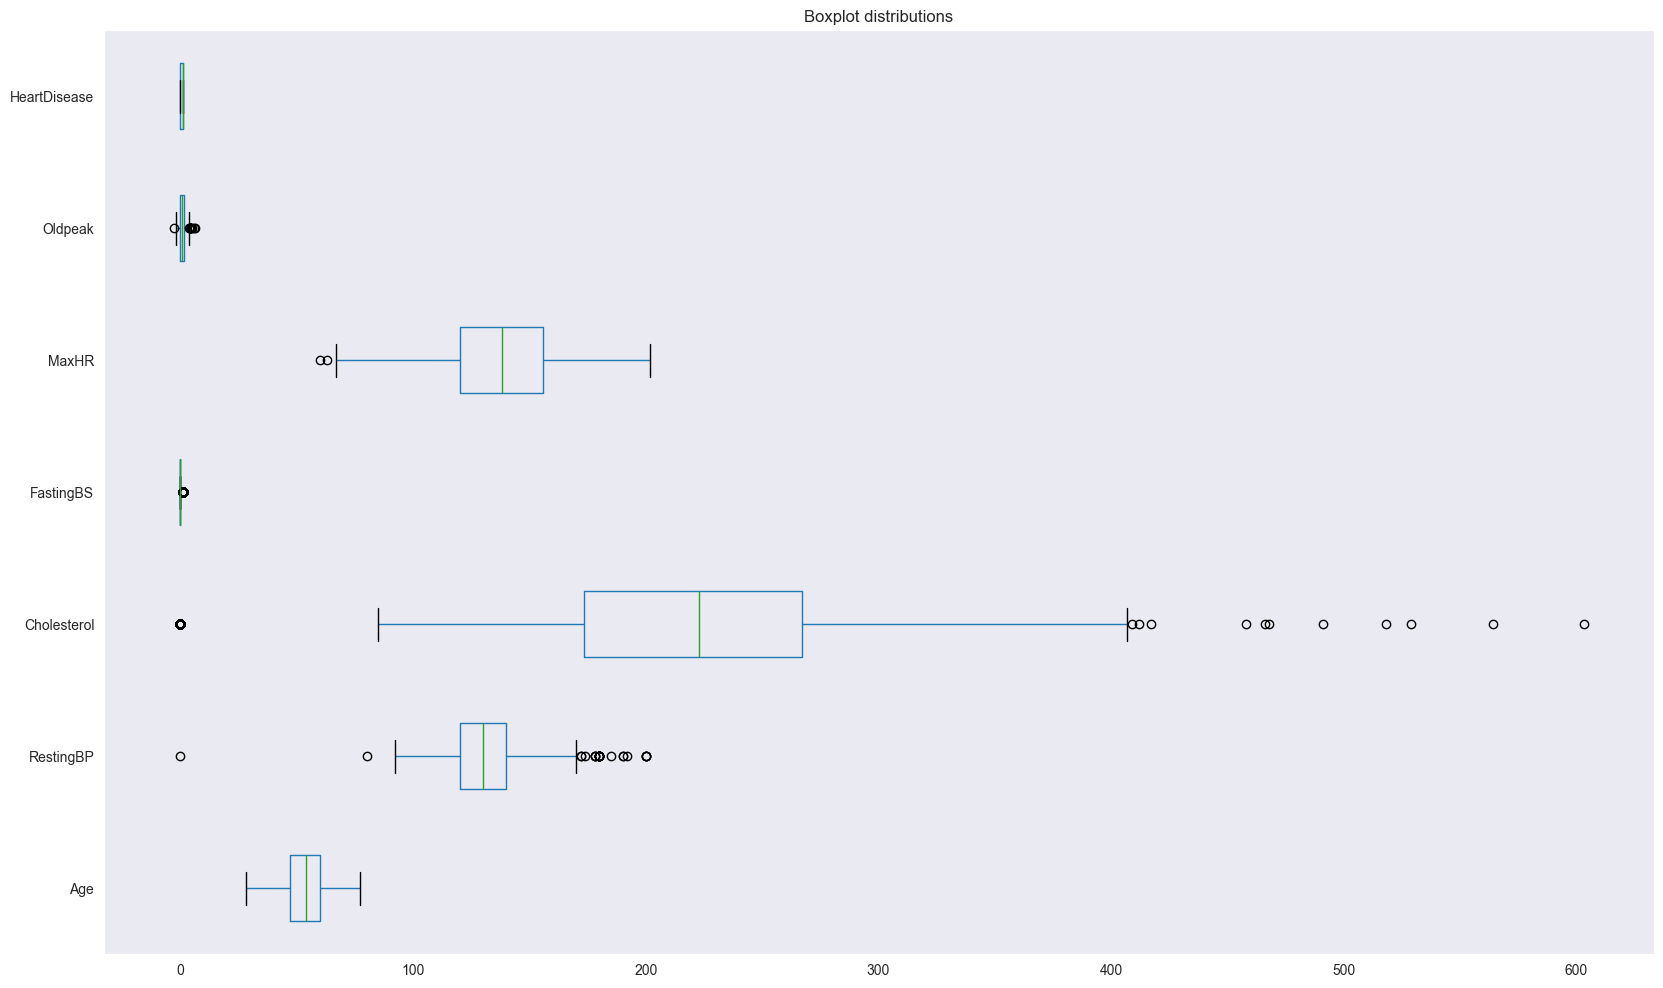

In [18]:
axs = df.boxplot(grid=False, vert=False, figsize=(20, 12))
axs.set_title("Boxplot distributions");

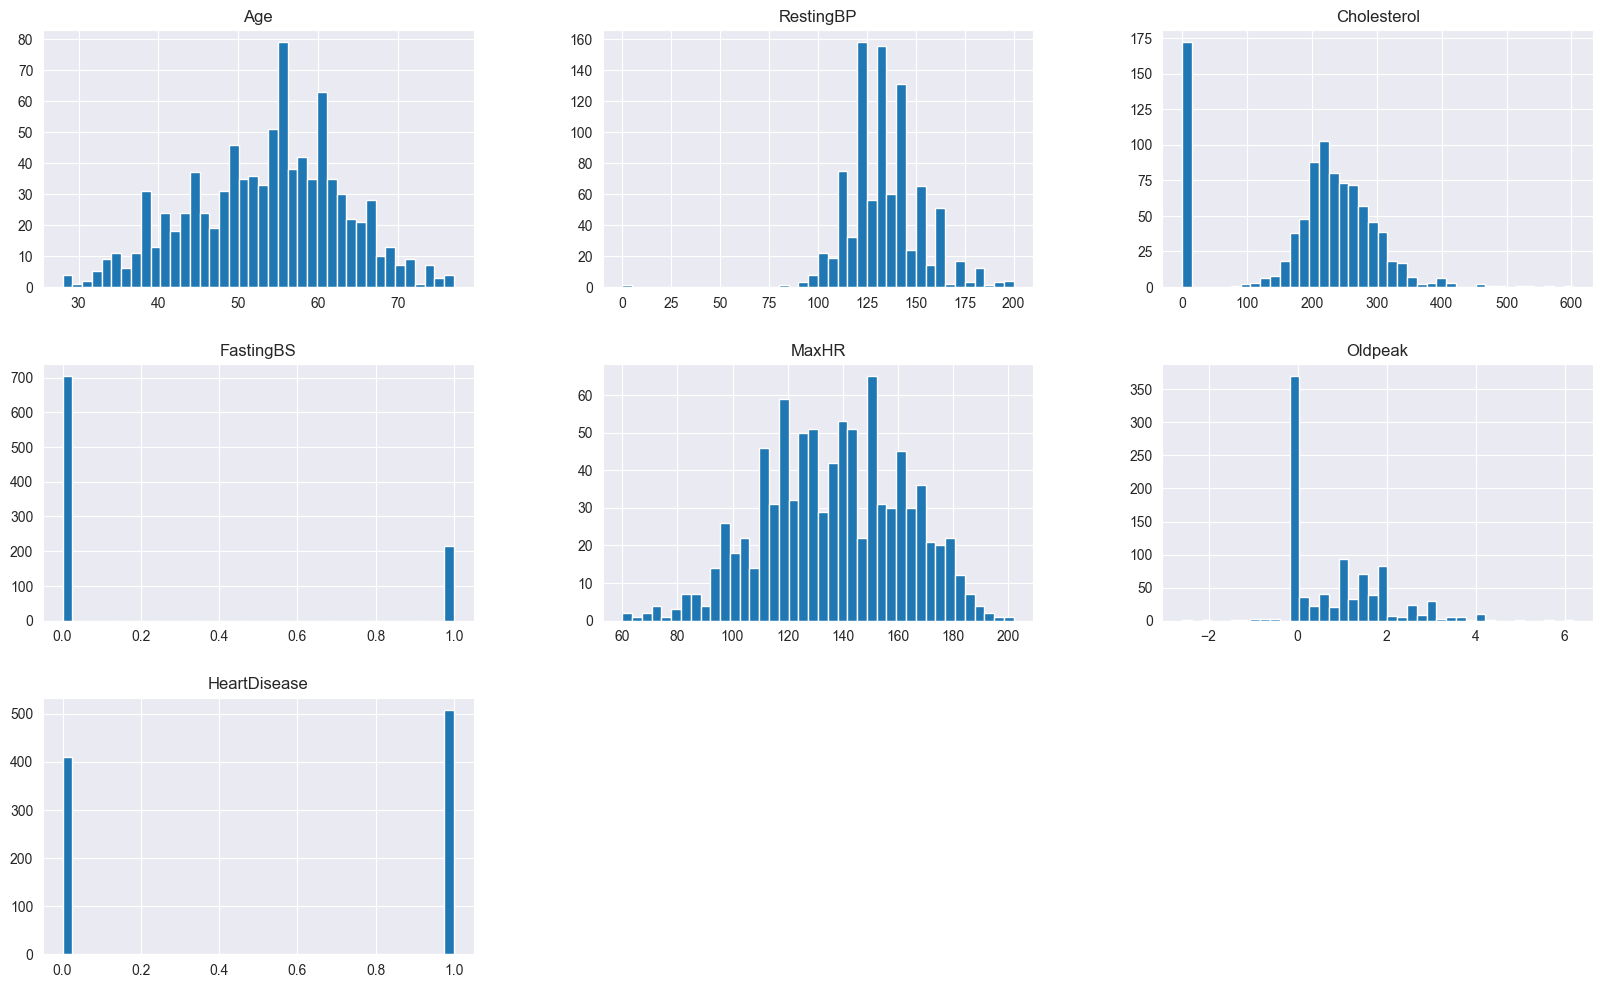

In [16]:
axs = df.hist(bins=40, figsize=(20, 12))

conclusion:
- Age and MaxHR look like normalization plots.
- Of the fastingBS attribute only 200 have a 1 and 700 have a 0
- Between the amounts of heart disease(400 and 500) has heart disease only a 100 more.
- OldPeak has a very high 0 count(350)
- RestingBP is higher around 125 to 140
- Cholesterol has a lot of 0 and around 220

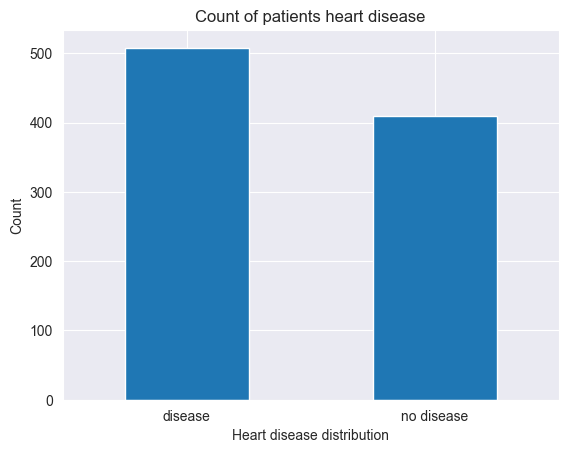

In [5]:
disease_mapping = {0: 'no disease', 1: 'disease'}

# Use the map function to replace values in the disease column
x = df['HeartDisease'].map(disease_mapping)

# Count the number of males and females
gender_counts = x.value_counts()

# Plot the counts
gender_counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Count of participants heart disease')
plt.xlabel('Heart disease distribution')
plt.ylabel('Count')
plt.show()

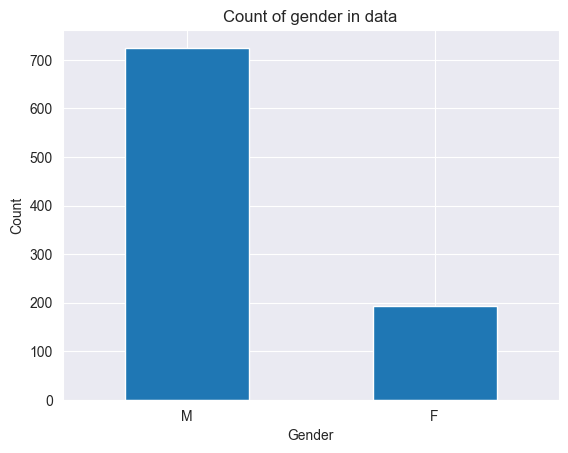

In [6]:
# Count the number of males and females
gender_counts = df['Sex'].value_counts()

# Plot the counts
gender_counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Count of gender in data')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

conclusion:
- Around 720 male participants and 190 female

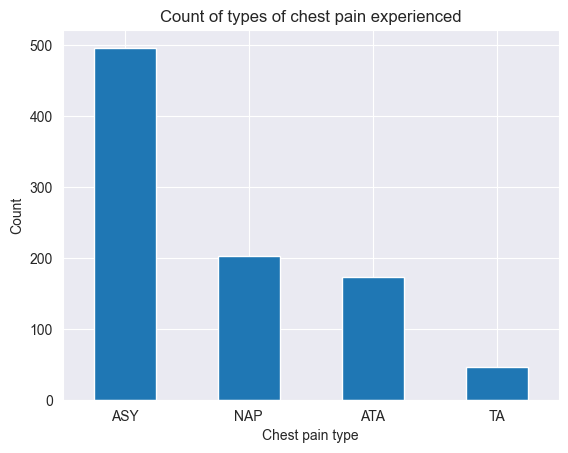

In [7]:
# Count the number of males and females
gender_counts = df['ChestPainType'].value_counts()

# Plot the counts
gender_counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Count of types of chest pain experienced')
plt.xlabel('Chest pain type')
plt.ylabel('Count')
plt.show()

conclusion:
- mostly ASY, the one that there is no chest discomfort.
- NAP and ATA is about the same between 200 en 180.
- TA is around 50, the typical symptoms for heart diseases. This can become a problem with training the machine learning model.

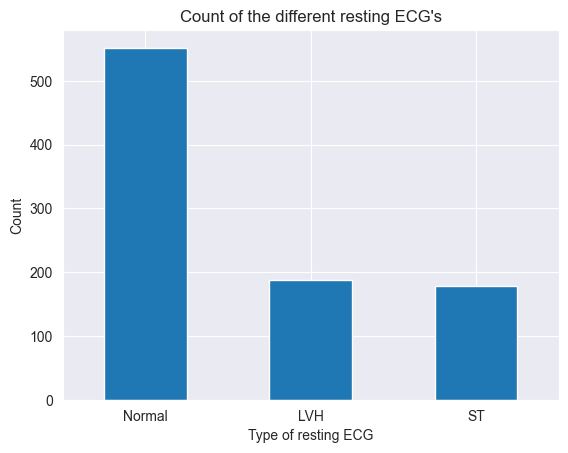

In [8]:
gender_counts = df['RestingECG'].value_counts()

# Plot the counts
gender_counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.title("Count of the different resting ECG's")
plt.xlabel('Type of resting ECG')
plt.ylabel('Count')
plt.show()


conclusion:
- mostly normal with around 550.
- LVH and ST both between 180 and 190.

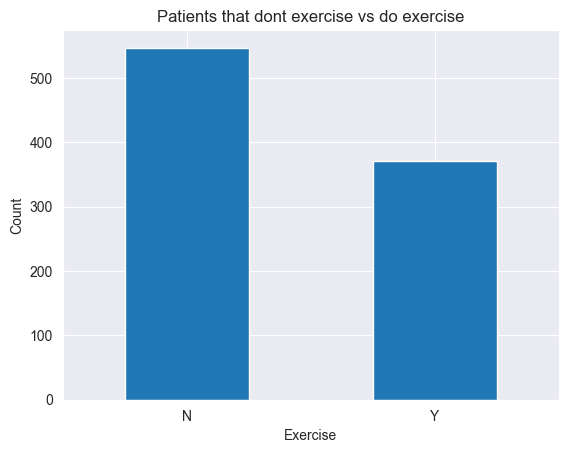

In [11]:
# Count the number of males and females
gender_counts = df['ExerciseAngina'].value_counts()

# Plot the counts
gender_counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Participants that dont exercise vs do exercise')
plt.xlabel('Exercise')
plt.ylabel('Count')
plt.show()

conclusion:
- most participants dont exercise around 550, only around 380 do exercise.

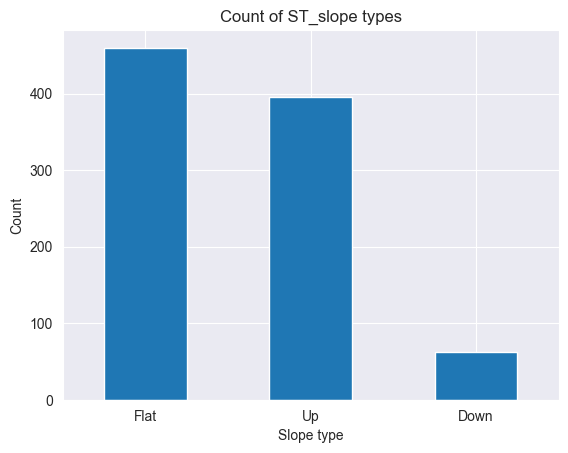

In [13]:
gender_counts = df['ST_Slope'].value_counts()

# Plot the counts
gender_counts.plot(kind='bar')
plt.xticks(rotation=0)
plt.title('Count of ST_slope types')
plt.xlabel('Slope type')
plt.ylabel('Count')
plt.show()


conclusion:
- Flat and up are high and down is very low compared. This might become a problem with training the machine learning model.

EDA bivariaat
- sns.pairplot
- sns.heatmap
- sns.boxplot
- something with anova??


To compare 2 variables with each-other the attributes with text have to be converted into numbers and because there are only 2/3/4 different values so this is possible.

In [26]:
hm_df = df.copy()

gender = {'M': 0, 'F': 1}#
hm_df['Sex'] = hm_df['Sex'].map(gender)

chest_pain = {'ATA': 0, 'ASY': 1, 'NAP': 2, 'TA': 3}
hm_df['ChestPainType'] = hm_df['ChestPainType'].map(chest_pain)

resting_ecg = {'Normal': 0, 'ST': 1, 'LVH': 2}
hm_df['RestingECG'] = hm_df['RestingECG'].map(resting_ecg)

exercise = {'N': 0, 'Y': 1}
hm_df['ExerciseAngina'] = hm_df['ExerciseAngina'].map(exercise)

slope = {'Down': 0, 'Flat': 1, 'Up': 2}
hm_df['ST_Slope'] = hm_df['ST_Slope'].map(slope)


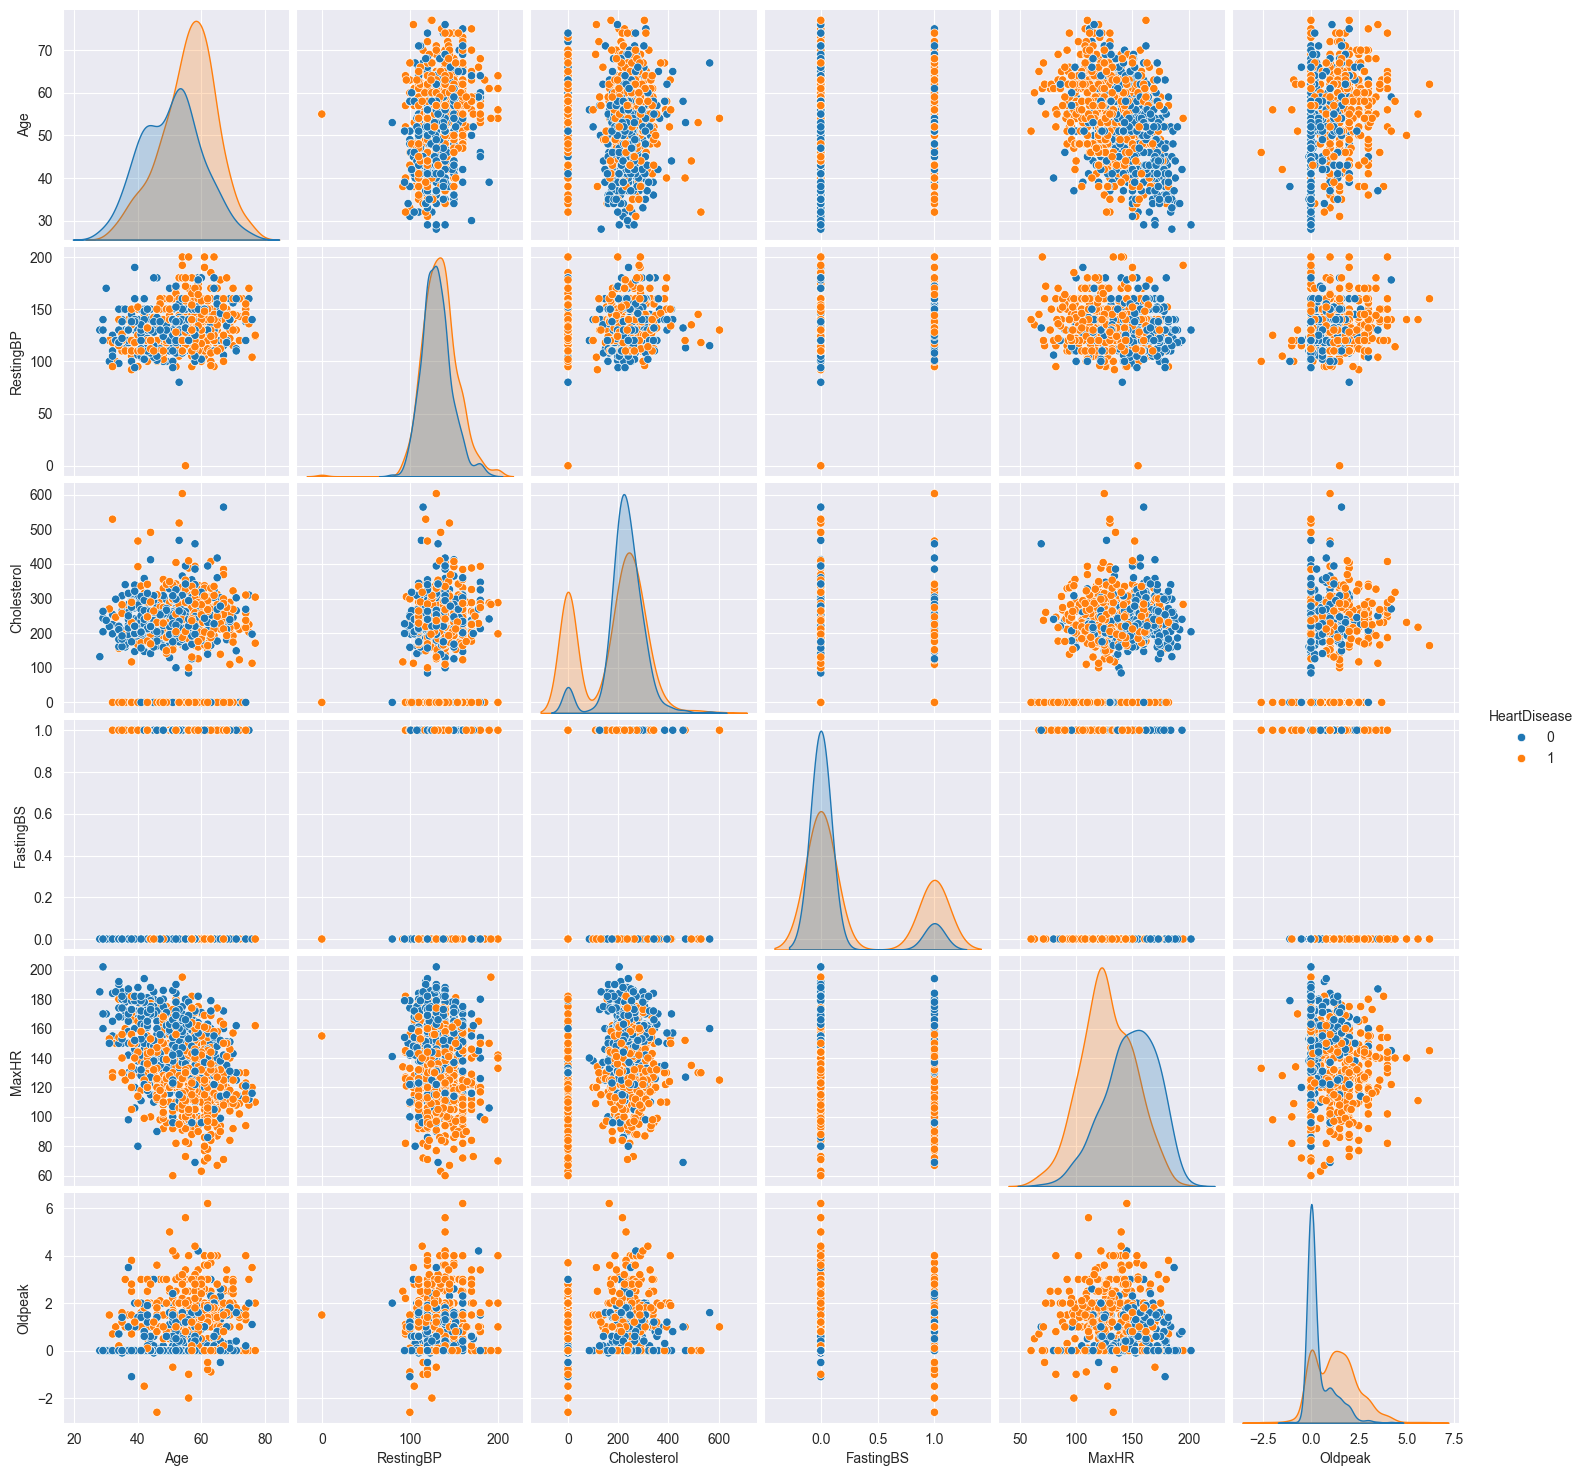

In [14]:
# heatmap
sns.pairplot(df, hue="HeartDisease");

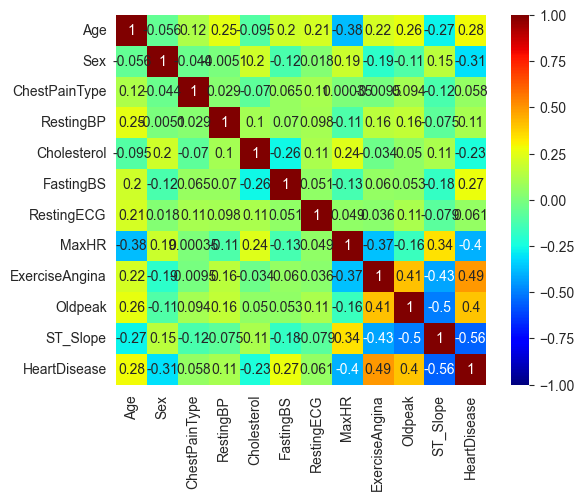

In [31]:
axs = sns.heatmap(hm_df.corr(), annot=True, cmap="jet", vmin=-1.0, vmax=1.0, square=True)

Conclusion:
- The distributions of sns.pairplot that only contained the numerical attributes are quite similar for participants with and without a heart disease.
- Correlation between Heart disease and ST_Slope, Heart disease and maxHR, ExerciseAngina and ST_Slope and also between Oldpeak and ST_Slope are rather bad. 
- Correlation between ExerciseAngina and Heart disease, Oldpeak and heart disease, ExerciseAngina and Oldpeak and also between MaxHR and ST_Slope are rather good.

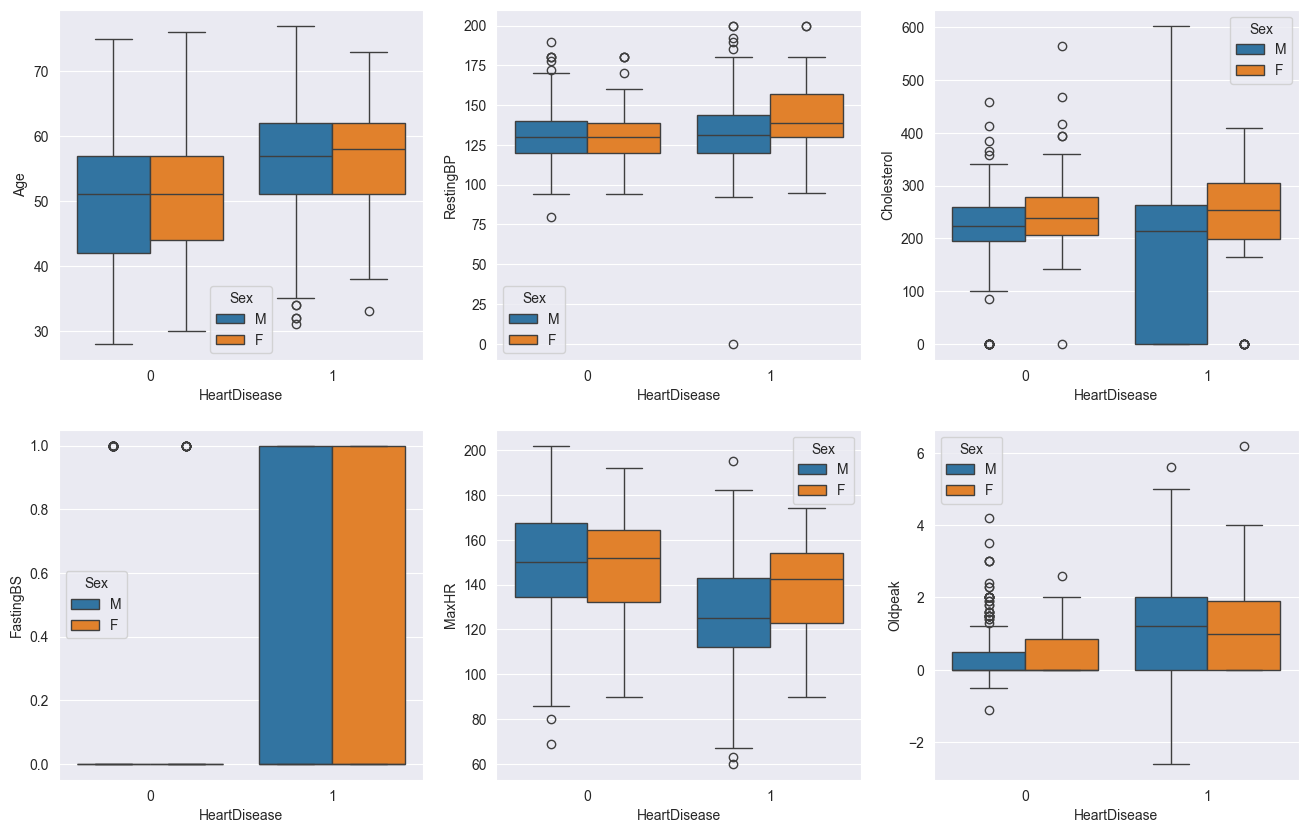

In [38]:
# here will be code for a boxplot
fig = plt.figure(figsize=(16.0, 10.0))
for index, attribute in enumerate(('Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak')):
    axs = fig.add_subplot(2, 3, index+1)
    sns.boxplot(df, x="HeartDisease", y=attribute, hue="Sex", ax=axs)
plt.show()

Conclusion:
- So with higher age the more change of having/getting a heart disease no matter the gender.
- RestingBP is about the same for heart disease or not exept for women with heart disease for those the values are higher. Men with a heart disease have around the same RestingBP as healthy, but woman have a higher restingBP(not much only around 10)
- If there weren't so many 0 at cholesterol it would probably be about the same for gender and Heart disease.
- lower MaxHR for heart disease then healthy.
- Old peak differs a lot between heart disease and healthy.

data impurity if necessary

In [ ]:
# deleting the row with 0 restingBP because 0 is inhuman to have
# maybe deleting rows with 0 in attribute cholesterol because 0 is inhuman to have

EDA multivariaat
- scaled data
- PCA maybe???